# 1. Contraception Usage in Connection with Literacy Rate and GDP
## 1.1 Introduction
In this lab, I analyze the connections between literacy rate, GDP (PPP per capita in current international dollars) and contraception use in countries around the world. Literacy rate is the percentage of people of age 15+ who can read and write, split into male and female categories. GDP stands for gross domestic product, PPP stands for purchasing power parity, and per capita means per person. Put together, GDP PPP per capita in current international dollars is the average income of a person in a given country, adjusted for variables like the cost of living, in current international dollars. Contraception usage was quantified through three variables: percentage of women using any contraception method, percentage of women using a modern contraception method, and percentage of women who use condoms. The women surveyed were ages 15-49, and were married or in a union. 
The three data sets I analyzed were from different sources. Literacy rates and GDP (ppp per captia) were obtained from the World Bank, while contraception use was obtained from the UN. However, it is important to note that while the UN compiled contraception use into one document, the data was not collected by the UN itelf, but by other organizations. These surveys about contraception were implemented by groups such as UNICEF, the Arab League of Nations, and the CDC. Specific information about these sources can be found on in the file listed in the bibliography at the bottom of this document. 
In addition, because of the difficulty of collecting data on such a large scale, the data sets for literacy rates and 
Below, I read in my data, and functions necessary to analyze it. 
Note: The cell below can take a long time to load. It will print "done" when it has completed running. 

## 1.2 Reading in GDP (ppp per capita), GDP and Literacy Rates

In [173]:
%matplotlib inline
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import scipy.stats
import csv
import math

#read in contraception data
with open('contraceptiveUN.csv', 'r') as f:
    reader = csv.reader(f)
    data_list = list(reader)

removed = 0
# ".." is no value

#contraception arrays

code = [] #column 0
country = [] #column 1
year = [] #column 2
any_method = [] #column 3
modern_method = [] #column 4
condom = [] #column 5
    
for kk in range(len(data_list)-1):
    
    code.append(data_list[kk][0])
    country.append(data_list[kk][1])
    year.append(float(data_list[kk][2]))
    any_method.append(data_list[kk][3])
    modern_method.append(data_list[kk][4])
    condom.append(data_list[kk][5])
    
#create list of contraception data
contraception_list = []
for ii in range(len(country)):
    if (any_method[ii] != '..') and (modern_method[ii] != '..') and (condom[ii] != '..'):
        Tuple = (code[ii], #0
                 country[ii], #1 
                 year[ii], #2
                 float(any_method[ii]), #3
                 float(modern_method[ii]), #4
                 float(condom[ii]), #%
                 float(any_method[ii])-float(modern_method[ii]),
                 float(any_method[ii])-float(condom[ii]),
                 float(modern_method[ii])-float(condom[ii]))
        contraception_list.append(Tuple)

#read in ppp GDP per capita data
with open('pppGDPperCapita.csv', 'r') as f:
    reader = csv.reader(f)
    data_list2 = list(reader)

# ".." is no value
GDP_list = []

del(data_list2[0])

#creates a tuple list of the countries and their GDPs by year
for ii in range(len(data_list2)):
    #1990
    if(data_list2[ii][4] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                 1990, #year
                 float(data_list2[ii][4])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2000
    if(data_list2[ii][5] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                2000, #year
                float(data_list2[ii][5])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2006
    if(data_list2[ii][6] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                 2006, #year
                 float(data_list2[ii][6])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2007
    if(data_list2[ii][7] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                2007, #year
                float(data_list2[ii][7])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2008
    if(data_list2[ii][8] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                 2008, #year
                 float(data_list2[ii][8])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2009
    if(data_list2[ii][9] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                2009, #year
                float(data_list2[ii][9])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2010
    if(data_list2[ii][10] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                2010, #year
                float(data_list2[ii][10])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2011
    if(data_list2[ii][11] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                 2011, #year
                 float(data_list2[ii][11])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2012
    if(data_list2[ii][12] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                 2012, #year
                 float(data_list2[ii][12])) #ppp GDP per capita
        GDP_list.append(Tuple)
    #2013
    if(data_list2[ii][13] != '..'):
        Tuple = (data_list2[ii][3], #country code (STR)
                data_list2[ii][2], #country name 
                 2007, #year
                 float(data_list2[ii][13])) #ppp GDP per capita
        GDP_list.append(Tuple)    

#country code file: creating a dictionary
with open('countrycodes.csv', 'r') as f:
    reader = csv.reader(f)
    data_list3 = list(reader)
    
del(data_list3[0])

country_code = {}
#creating dictionary: number code, string code
for jj in range(len(data_list3)): 
    country_code[data_list3[jj][0]] = data_list3[jj][2]

#literacy rates CSV
with open('literacyrates.csv', 'r') as f:
    reader = csv.reader(f)
    data_list4 = list(reader)
    
#LIST INDEX OUT OF RANGE
literacyRate = []
for ii in range(1, len(data_list4)):
    for kk in range(2, 25, 2): #from 2 to 25, skip by 2s
        if (data_list4[ii][kk] != '..') and (data_list4[ii][kk+1] !='..'):
            Tuple = (data_list4[ii][1], #country code (str)
                     float(data_list4[0][kk][0:4]), #year
                     float(data_list4[ii][kk]), #adult literacy rate 15+ female
                     float(data_list4[ii][kk+1])) #adult literacy rate 15+ male
            literacyRate.append(Tuple)
    
#GDP and Contraception Data: Overlapping Years
GDP_Contraception = []
for ii in range(len(contraception_list)):
    for kk in range(len(GDP_list)):
        if (country_code[contraception_list[ii][0]]==GDP_list[kk][0]) and (contraception_list[ii][2]==GDP_list[kk][2]):
            Tuple = (contraception_list[ii][0], #column 0: country code (number)
                    contraception_list[ii][1], #column 1: country name
                    contraception_list[ii][2], #column 2: year
                    contraception_list[ii][3], #column 3: any method
                    contraception_list[ii][4], #column 4: modern method
                    contraception_list[ii][5], #column 5: condom
                    GDP_list[kk][3], #column 6: GDP ppp
                    contraception_list[ii][6], #column 7: difference between anymethod and modern method) 
                    contraception_list[ii][7], #column 8: difference between anymethod and condom
                    contraception_list[ii][8]) #column 9: difference between modern method and condom
            GDP_Contraception.append(Tuple)


#literacy rate and contraception data: overlapping years
literacy_Contraception = []
for ii in range(len(literacyRate)):
    for kk in range(len(contraception_list)):
        if (literacyRate[ii][0]==country_code[contraception_list[kk][0]]) and (literacyRate[ii][1]==contraception_list[kk][2]):
            Tuple = (contraception_list[kk][0], #0: country code
                     contraception_list[kk][1], #1: country name
                     contraception_list[kk][2], #2: year
                     contraception_list[kk][3], #column 3: any method
                     contraception_list[kk][4], #column 4: modern method
                     contraception_list[kk][5], #column 5: condom
                     literacyRate[ii][2], #column 6: adult literacy rate 15+ female
                     literacyRate[ii][3]) #column 7: adult literacy rate 15+ male
            literacy_Contraception.append(Tuple)

print("done")

done


## 1.3 Reading in Functions for Processing Data Stored in Tuple Lists

In [175]:
def includeIfValue(some_tuple_list, element, operator, value):
    new_list = []
    if (operator == "=="):
        for ii in range(len(some_tuple_list)):
            if some_tuple_list[ii][element] == value:
                new_list.append(some_tuple_list[ii])
    elif  (operator == "<"):
        for ii in range(len(some_tuple_list)):
            if some_tuple_list[ii][element] < value:
                new_list.append(some_tuple_list[ii])
    elif (operator == ">"):
        for ii in range(len(some_tuple_list)):
            if some_tuple_list[ii][element] > value:
                new_list.append(some_tuple_list[ii])
    return new_list
    
#reads in a tuple list, a function that returns a boolean (input is a tuple), and a value
#returns a list of tuples
def newTupleList(some_tuple_list, f, Value):
    new_list = []
    for ii in range(len(some_tuple_list)):
        if (f(some_tuple_list[ii], Value)):
            new_list.append(some_tuple_list[ii])
    return new_list

#prints an element of a tuple list
def printElementOf(some_tuple_list, element):
    for ii in range(len(some_tuple_list)):
        print(some_tuple_list[ii][element])

#turns an element of a tuple list into an array
def tupleList(some_tuple_list, element):
    new_list = []
    for ii in range(len(some_tuple_list)):
        new_list.append(some_tuple_list[ii][element])
    return new_list

#finds the percent of an element in a list that is a value
def percent(some_tuple_list, element, value):
    elementPresent = 0
    for ii in range(len(some_tuple_list)):
        if some_tuple_list[ii][element] == value:
            elementPresent+=1
    return (elementPresent/len(some_tuple_list))*100

#averages a column in a tuple list (averageType = mean, median or mode)
def averageTuple(some_tuple_list, element, averageType):
    new_list = []
    for ii in range(len(some_tuple_list)):
        new_list.append(some_tuple_list[ii][element])
    try:
        if averageType == "mean":
            return stat.mean(new_list)
        if averageType == "median":
            return stat.median(new_list)
        if averageType == "mode":
            return stat.mode(new_list)
    except:
        print("No data points found")
        return 0
        
#finds the correlation coefficient bewteen two elements in a tuple array
def pearsonRTuple(some_tuple_list, element1, element2):
    new_list1 = []
    new_list2 = []
    for ii in range(len(some_tuple_list)):
        new_list1.append(some_tuple_list[ii][element1])
        new_list2.append(some_tuple_list[ii][element2])
    return scipy.stats.pearsonr(new_list1, new_list2)[0]
    
#creates a histogram of an element in a tuple array, with a specified bin size
#if bin_size = 0, auto sets binsize
def createHist(some_tuple_list, element, bin_size):
    new_list = []
    for ii in range(len(some_tuple_list)):
        new_list.append(some_tuple_list[ii][element])
    maximum = int(math.ceil(max(new_list)))
    if bin_size != 0: 
        bins_list = []
        for hh in range(int(math.ceil(maximum/bin_size))):
            bins_list.append(bin_size*hh)
        plt.hist(new_list, bins_list)
    else: 
        plt.hist(new_list)

def createScatter(some_tuple_list, elementx, elementy):
    new_listx = []
    new_listy = []
    for ii in range(len(some_tuple_list)):
        new_listx.append(some_tuple_list[ii][elementx])
        new_listy.append(some_tuple_list[ii][elementy])
    plt.scatter(new_listx, new_listy)
    
def createScatterColor(some_tuple_list, elementx, elementy, color):
    new_listx = []
    new_listy = []
    for ii in range(len(some_tuple_list)):
        new_listx.append(some_tuple_list[ii][elementx])
        new_listy.append(some_tuple_list[ii][elementy])
    plt.scatter(new_listx, new_listy, c=color)
    
def newPlot(title, xlabel, ylabel):
    secondPlot = plt.figure()
    ax2 = secondPlot.add_subplot(111)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def newLogPlotY(title, xlabel, ylabel):
    secondPlot = plt.figure()
    ax2 = secondPlot.add_subplot(111)
    ax2.set_yscale("log")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def newLogPlotX(title, xlabel, ylabel):
    secondPlot = plt.figure()
    ax2 = secondPlot.add_subplot(111)
    ax2.set_xscale("log")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# 2. Contraceptive Use
## 2.1 Mean Contraceptive Use

In [176]:
print("Mean Women using Any Contraception Methods", averageTuple(contraception_list, 3, "mean"), "%")
print("Mean Women using Modern Contraception Methods:", averageTuple(contraception_list, 4, "mean"), "%")
print("Mean Women using Condoms:", averageTuple(contraception_list, 5, "mean"), "%")

Mean Women using Any Contraception Methods 48.06614060258249 %
Mean Women using Modern Contraception Methods: 39.017073170731706 %
Mean Women using Condoms: 6.496126255380201 %


Worldwide, an average of 48% of women in any given country use any method of contraception, while an average of 39% use a modern method. 
However, on average, only 6.5% of women used condoms. While this seems low at first, it can be accounted for by the fact that the women surveyed are women in unions. According to NAMAidsmap, people are far less likely to use condoms with their primary partner than other partners. In one survey in Nigeria, "2/3 of respondants reported 'always' using condoms during casual sex, 1/3 with a boyfriend or girlfriend--and just 2% with a spouse" ("Condom Use in the Real World"). 
The difference in percentage of women using contraception and those using condoms can also be accounted for by the fact that condoms are used to prevent the spread of STDs. If women believe that their primary partner is STD-free, and is only having sex with them, there is no reason to use condoms. This indicates that most contraception usage among women in unions is to prevent pregnancy. 

## 2.2 Correlation Between Types of Contraception Usage

In [177]:
print("Correlation between any method and modern method:", pearsonRTuple(contraception_list, 3, 4))
print("Correlation between any method and condom use:", pearsonRTuple(contraception_list, 3, 5))
print("Correlation between modern method and condom use:", pearsonRTuple(contraception_list, 4, 5))

Correlation between any method and modern method: 0.924947931301
Correlation between any method and condom use: 0.516053244044
Correlation between modern method and condom use: 0.478085399147


Within countries, the correlation bewteen use of any contraception method and modern contraception method is 0.92, a very high correlation (a correlation of 1.0 means that the two variables being compared are perfectly correlated). This makes sense, as women who use modern contraception also use any contraception method. 
Correlation between condom use and any method or modern method is much lower: 0.52 and 0.48, respectively. This could be explained by the fact that condoms are used to prevent the spread of STDs, whereas other contraception methods that are not a physical barrier merely prevent pregnancy. If women primarily use condoms primarily with other partners, the number of partners they have outside their union could have a large effect on condom use, which would then have an effect on the correlations above. 

# 3. GDP and Contraception
## 3.1 Correlation between GDP and Contraception

In [178]:
print("Correlation between GDP and any method:", pearsonRTuple(GDP_Contraception, 3, 6))
print("Correlation between GDP and modern method:", pearsonRTuple(GDP_Contraception, 4, 6))
print("Correlation between GDP and condom use:", pearsonRTuple(GDP_Contraception, 5, 6))

Correlation between GDP and any method: 0.385378621258
Correlation between GDP and modern method: 0.411291274771
Correlation between GDP and condom use: 0.466031572447


The correlations of GDP and any method and of GDP and modern method are low and similar, around 0.4. The correlation between GDP and condom use is slightly higher, around 0.5. 

## 3.2 Scatter Plots of GDP and Contraception
In the scatter plots below, you can see that the relationship between GDP and any method of contraception and the relationship between GDP and modern methods of contraception are linear when plotted on a logarithmic scale.  

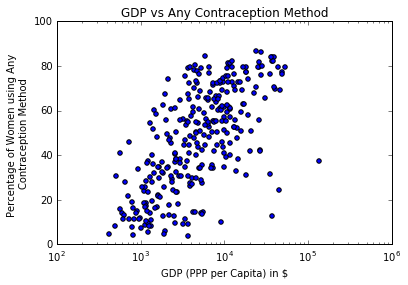

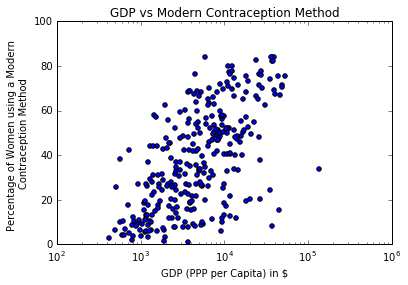

In [179]:
newLogPlotX("GDP vs Any Contraception Method","GDP (PPP per Capita) in $","Percentage of Women using Any \nContraception Method")
plt.axis([10**2, 10**6, 0, 100])
createScatter(GDP_Contraception, 6, 3)

newLogPlotX("GDP vs Modern Contraception Method","GDP (PPP per Capita) in $","Percentage of Women using a Modern \nContraception Method")
plt.axis([10**2, 10**6, 0, 100])
createScatter(GDP_Contraception, 6, 4)

However, the plot of condom usage looks very different. Most countries have condom usage rates very close to zero. As GDP goes up, more countries have higher condom use, however there are still many countries with high GDPs where condom use is low or close to zero. 

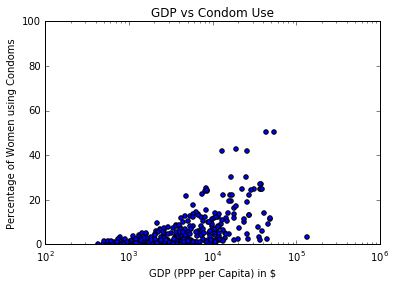

In [180]:
newLogPlotX("GDP vs Condom Use","GDP (PPP per Capita) in $","Percentage of Women using Condoms")
plt.axis([10**2, 10**6, 0, 100])
createScatter(GDP_Contraception, 6, 5)

## 3.3 Correlation between log of GDP and Contraception Use

In [181]:
GDP = tupleList(GDP_Contraception, 6)
Any = tupleList(GDP_Contraception, 3)
Modern = tupleList(GDP_Contraception, 4)
Condom = tupleList(GDP_Contraception, 5)
logGDP = []
for ii in range(len(GDP)):
    logGDP.append(math.log(GDP[ii]))

print("Correlation between log of GDP and any method:", scipy.stats.pearsonr(logGDP, Any)[0])
print("Correlation between log of GDP and modern method:", scipy.stats.pearsonr(logGDP, Modern)[0])
print("Correlation between log of GDP and condom use:", scipy.stats.pearsonr(logGDP, Condom)[0])

Correlation between log of GDP and any method: 0.65586365617
Correlation between log of GDP and modern method: 0.618073733616
Correlation between log of GDP and condom use: 0.570194748855


When the pearson r correlation coefficient is taken of the log of GDP and contraception types, the correlation goes up from linear correlation of 0.4 found in section 3.1. This indicates that the relationship between GDP and contraception usage follows a power law. 
However, the contraception variables with the greatest correlation coefficients switched: before the log was taken, condom use and GDP had the highest correlation, but afterwards it had the lowest correlation (not by much, though). 

# 4. Literacy Rate and Contraception
## 4.1 Mean, Correlation of Literacy Rate of Men and Women

In [182]:
print("Mean literacy rate of women 15+:", averageTuple(literacyRate, 2, "mean"), "%")
print("Mean literacy rate of men 15+", averageTuple(literacyRate, 3, "mean"), "%")

Mean literacy rate of women 15+: 79.60122913879282 %
Mean literacy rate of men 15+ 87.02756977668508 %


The average percentage of men who are literate worldwide is higher than the percentage of women who are literate, by around 7 points. 

In [183]:
print("Correlation Between Literacy Rates of Men and Women (ages 15+):", pearsonRTuple(literacyRate, 3, 2))

Correlation Between Literacy Rates of Men and Women (ages 15+): 0.956132763395


In addition, the correlation between the literacy rates of men and women is very close to one, indicating that the literacy rates of men and women generally rise together. 

## 4.2 Correlation Between Literacy Rate and Contraception

In [184]:
print("Correlation between literacy rate of women and percent of women using any contraception method:", pearsonRTuple(literacy_Contraception, 6, 3))
print("Correlation between literacy rate of men and percent of women using any contraception method:", pearsonRTuple(literacy_Contraception, 3, 7), "\n")

print("Correlation between literacy rate of women and percent of women using a modern contraception method:", pearsonRTuple(literacy_Contraception, 4, 6))
print("Correlation between literacy rate of men and percent of women using a modern contraception method:", pearsonRTuple(literacy_Contraception, 4, 7),"\n")

Correlation between literacy rate of women and percent of women using any contraception method: 0.758489062744
Correlation between literacy rate of men and percent of women using any contraception method: 0.71242666453 

Correlation between literacy rate of women and percent of women using a modern contraception method: 0.702060605289
Correlation between literacy rate of men and percent of women using a modern contraception method: 0.624115459616 



The correlation between contraception methods and literacy rates are high. In addition, there is not a large difference in correlation of contraception methods and the literacy rate of men and the literacy rate of women. However, in for all three contraception categories, the correlation between contraception use and literacy rate of women was higher than the correlation between contracetption use and the literacy rate of men. 
The correlation between condom use and literacy rate followed this pattern, but was considerably lower than the correlation between other methods and literacy rate. This can be explained by the fact that condoms are used less frequently during sexual engagement with primary partners, as discussed in section 2.1. This means that the number of women in unions using them is much lower overall, so the difference could be noise. In addition, among women in unions, condoms are primarily used to prevent the spread of STDs, whereas other methods of birth control are used primarily to prevent pregnancy. So, condom usage could be higher in countries where it is more common for women have sex with someone other than their partner, which would cause a difference in correlation. 

In [185]:
print("Correlation between literacy rate of women and percent of women using condoms:", pearsonRTuple(literacy_Contraception, 5, 6))
print("Correlation between literacy rate of women and percent of men using condoms:", pearsonRTuple(literacy_Contraception, 5, 7),"\n")

Correlation between literacy rate of women and percent of women using condoms: 0.45713365328
Correlation between literacy rate of women and percent of men using condoms: 0.405032398768 



## 4.3 Scatter Plots of Literacy Rate and Contraception Use

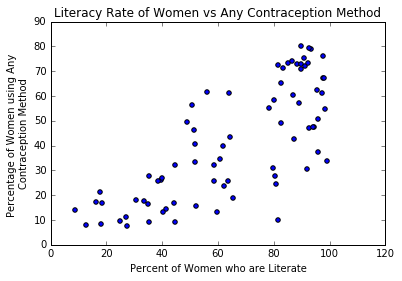

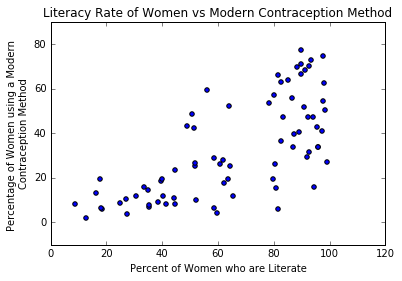

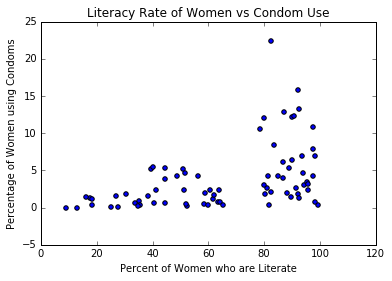

In [186]:
newPlot("Literacy Rate of Women vs Any Contraception Method","Percent of Women who are Literate","Percentage of Women using Any \nContraception Method")
createScatter(literacy_Contraception, 6, 3)

newPlot("Literacy Rate of Women vs Modern Contraception Method","Percent of Women who are Literate","Percentage of Women using a Modern \nContraception Method")
createScatter(literacy_Contraception, 6, 4)

newPlot("Literacy Rate of Women vs Condom Use","Percent of Women who are Literate","Percentage of Women using Condoms")
createScatter(literacy_Contraception, 6, 5)

In the scatter plots above, it is clear that as literacy rate of women goes up, percentage of women who use contraception also goes up. However, there is a wide spread: countries that have high literacy rates do not necessarily have high contraception use rates. 

Note: For some reason there aren't literacy rate values between 60% and 80% for women. However, in scatter plots of the literacy rate of men versus contraception use, there are literacy rate values between 60% and 80%. Other than this difference, scatter plots of the literacy rate of men versus contraception use were very similar, which is why those scatter plots are not included here. 

# 5. Conclusion
Around 48% of women ages 15-49 who are married or in a union use any method of contraception, however only around 6.5% of these women use condoms. This could be because people are far less likely to use condoms with their primary partners than with other people. So, if these women are primarily having sex with their primary parters, condom use would be low. 

In addition, the correlation between GPD and contraception use (any and modern) is low, around 0.4. However, when the correlation of the log of GDP and contraception use (any and modern) is taken, the correlation coefficient increases to around 0.6, a much more meaningful correlation. However, the correlation between GDP and literacy rate of women is still higher than this, at 0.7. This indicates that the literacy rate of women is has a greater influence on their use of contraceptives. Interestingly, the correlation between GDP and condom use, 0.57, is not that much lower than the correlation bewteen GDP and other contraception methods. However, the correlation between literacy rate of women and condom use, 0.46, is much lower than the correlation bewteen literacy rate of women and other contraception methods, which is around 0.7. This shows that GDP and literacy rate of women go up, the percent of women using contraception also goes up. However, literacy rate affects the percent of women who use contraception more than GDP. 

In the future, I'd like to compare my current results to more data, such as use of specific types of contraception, use of contraception for women who are not married, birthrate, the GII (gender inequality index), as well as different measures of education, such as the percentage of women who complete secondary school. I'd also like to look at whether class, wealth, or race of individuals affects their access to contraception. 

# 6. Works Cited

                                        Works Cited
"Adult Literacy Rate, Population 15+ Years, Female (%)" World Development Indicators. The World Bank Group, n.d. Web. 29 Mar. 2016.

"Adult Literacy Rate, Population 15+ Years, Male (%)" World Development Indicators. The World Bank Group, n.d. Web. 29 Mar. 2016.

"Condom Use in the Real World." NAMAidsmap. NAM Publications, n.d. Web. 28 Mar. 2016.
"GDP per Capita, PPP (current International $)." World Development Indicators. The World Bank Group, n.d. Web. 29 Mar. 2016.

Openmundi. World. N.p.: GitHub, Inc., n.d. CSV. https://github.com/openmundi/world.csv

United Nations, Department of Economic and Social Affairs,  Population Division (2015).  2015 Update for the MDG Database: Contraceptive Prevalence (POP/DB/CP/A/MDG2015).